In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../source/Combined_Foreclosures.csv') # Prevent pandas from convert zip code into float

In [3]:
df = df[['Registered Date']] # Get rid of the index

In [4]:
df

,Registered Date
0,01/2014
1,05/2014
2,01/2014
3,04/2014
4,01/2014
...,...
35868,06/2022
35869,03/2022
35870,08/2022
35871,04/2022


In [5]:
result = {'Registered Date': [], 'Foreclosures': []}

for m in df['Registered Date'].unique():
    result['Registered Date'].append(m)
    result['Foreclosures'].append(df['Registered Date'].value_counts()[m])

result = pd.DataFrame.from_dict(result)

result.to_csv("../source/FORECLOSURE.csv")

print(result)

    Registered Date  Foreclosures
0           01/2014          1388
1           05/2014           488
2           04/2014           317
3           12/2014           790
4           10/2014           556
..              ...           ...
100         03/2022           227
101         04/2022           133
102         07/2022           140
103         08/2022           202
104         09/2022           194

[105 rows x 2 columns]


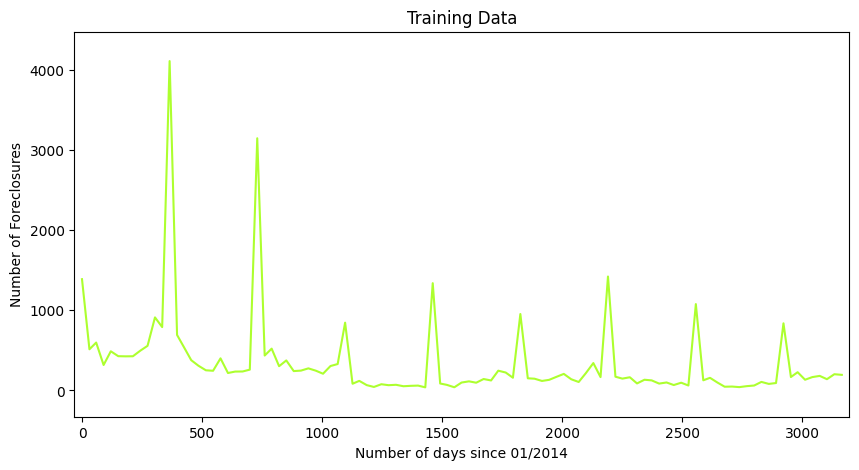

In [6]:
result['Registered Date'] = pd.to_datetime(result['Registered Date']) 
result['DATE_DELTA'] = (result['Registered Date'] - result['Registered Date'].min())  / np.timedelta64(1,'D')
result = result.sort_values('DATE_DELTA')

result = result.reset_index(drop=True)

import matplotlib.pyplot as plt
# Plot the results
plt.figure(figsize=(10,5))
plt.margins(x=0.01,y=0.09)
plt.plot(result['DATE_DELTA'], result['Foreclosures'],  color="greenyellow", lw=1.5)
plt.xlabel("Number of days since 01/2014")
plt.ylabel('Number of Foreclosures')
plt.title("Training Data")
#plt.title("Monthly Foreclosures")
plt.savefig('../plots/Foreclosures.png')
plt.show()
